In [1]:
my_list = ([1,3,5,7,2,5,9,3,0,4,8])

In [2]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#define the oracle circuit
oracle = QuantumCircuit(2, name = 'oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

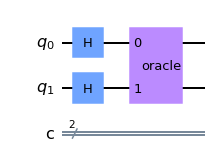

In [4]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw(output = 'mpl')

In [5]:
job = execute(grover_circ,backend)
results = job.result()

In [6]:
sv=results.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [7]:
reflection = QuantumCircuit(2, name = 'refelection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='refelection', num_qubits=2, num_clbits=0, params=[])

In [8]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [8]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2, 2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌─────────┐┌──────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0             ├┤M├───
     ├───┤│  oracle ││  refelection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1             ├─╫─┤M├
     └───┘└─────────┘└──────────────┘ ║ └╥┘
c: 2/═════════════════════════════════╩══╩═
                                      0  1

In [10]:
job = execute(grover_circ, backend, shots = 1024)
result = job.result()
result.get_counts()

{'11': 1024}